In [80]:
print("hello...!")

hello...!


## **TITLE: PROBABILITY AND STATISTICS**

### **1. Descriptive Statistics**
Use a dataset : Iris Dataset. Perform the following tasks:    
 a. Compute the mean, median, and standard deviation for all numerical features.<br> 
 b. Create histograms and boxplots for feature distributions.<br>
 c. Calculate the correlation matrix for the features.<br>
 d. Interpret which features are most correlated with each other.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [82]:
# Load Iris dataset
iris = load_iris()

# Create DataFrame with column names
df = pd.DataFrame(iris.data, columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

# Compute mean, median, and standard deviation
stats = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Standard Deviation': df.std()
})

# Display the results
print(stats)


                  Mean  Median  Standard Deviation
Sepal Length  5.843333    5.80            0.828066
Sepal Width   3.057333    3.00            0.435866
Petal Length  3.758000    4.35            1.765298
Petal Width   1.199333    1.30            0.762238


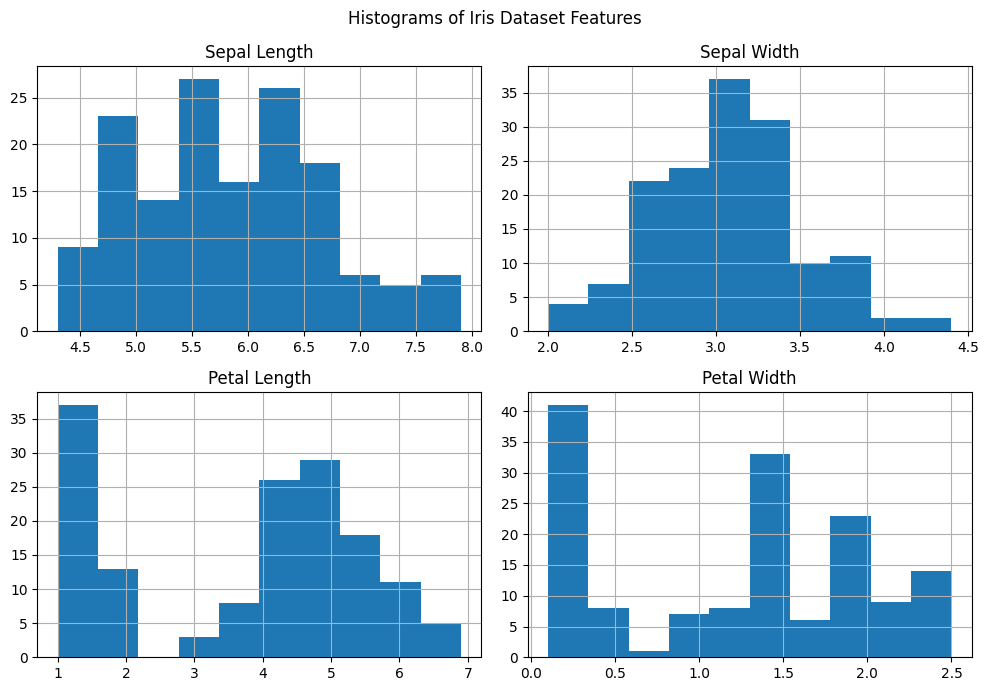

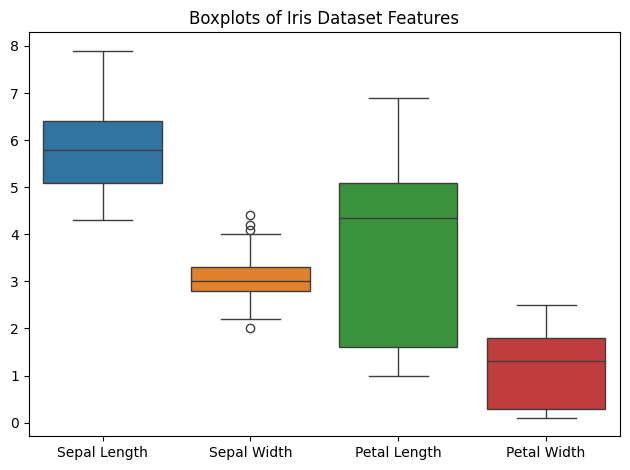

In [83]:
# Histograms for each feature
df.hist(bins=10, figsize=(10, 7))
plt.suptitle('Histograms of Iris Dataset Features')
plt.tight_layout()
plt.show()

# Boxplots for each feature
sns.boxplot(df)
plt.title('Boxplots of Iris Dataset Features')
plt.tight_layout()
plt.show()


In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

              Sepal Length  Sepal Width  Petal Length  Petal Width
Sepal Length      1.000000    -0.117570      0.871754     0.817941
Sepal Width      -0.117570     1.000000     -0.428440    -0.366126
Petal Length      0.871754    -0.428440      1.000000     0.962865
Petal Width       0.817941    -0.366126      0.962865     1.000000


**A. Strong Positive Correlations(correlation ~ +1):**
1. Sepal Length & Petal Length: (0.871754) As one increases, so does the other.
2. Sepal Length & Petal Width: (0.817941) Larger sepals are associated with larger petals.
3. Petal Length & Petal Width: (0.962865) A very strong direct relationship between these two.

**B. Weak/Negative Correlations(correlation ~ -1):**
1. Sepal Length & Sepal Width: (-0.117570) A very weak negative relationship.
2. Sepal Width & Petal Length: (-0.428440) A moderate negative relationship.
3. Petal Width & Sepal Width: (-0.366126) A weak negative relationship.

### **2. Conditional Probability Given the following table of events, compute P(A∣B) and P(B∣A)**<br>
|&emsp;&emsp;&emsp;|&emsp;B &nbsp;&emsp;|&nbsp;not B&nbsp;&nbsp;&nbsp;&nbsp;|<br>
|&emsp;A&emsp;     |&emsp;30&emsp;|&emsp;20&emsp;&nbsp;&nbsp;|<br>
| not A            |&emsp;50&emsp;|&emsp;100&emsp;|

In [85]:
# Given values
A_and_B = 30
A_and_not_B = 20  
not_A_and_B = 50  
not_A_and_not_B = 100  

# Total number of observations
total = A_and_B + A_and_not_B + not_A_and_B + not_A_and_not_B

# Calculate the conditional probability P(A | B)
P_A_given_B = A_and_B / (A_and_B + not_A_and_B)

# Calculate the conditional probability P(B | A)
P_B_given_A = A_and_B / (A_and_B + A_and_not_B)

# Output the results
print(f"P(A | B) = {P_A_given_B:.4f}")
print(f"P(B | A) = {P_B_given_A:.4f}")


P(A | B) = 0.3750
P(B | A) = 0.6000


### **3. Bayes' Theorem**
A model classifies spam emails with the following probabilities:<br>
P(Spam)=0.2<br>
P(Not Spam)=0.8<br>
P(Keyword | Spam)=0.7<br>
P(Keyword | Not Spam)=0.1<br>
Compute the probability that an email is spam given that it contains the keyword.

In [86]:
# Given probabilities
P_Spam = 0.2
P_Not_Spam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_Not_Spam = 0.1

# Compute P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_Not_Spam * P_Not_Spam)

# Compute P(Spam | Keyword) using Bayes' Theorem
P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

# Print the result
print(f"P(Spam | Keyword) = {P_Spam_given_Keyword:.4f}")


P(Spam | Keyword) = 0.6364


### **4. Outlier Detection, Removal, and Feature Scaling**
Choose a dataset on your own and perform the following operation:<br>
- Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.<br>
- Calculate the IQR (IQR=Q3−Q1).<br>
- Define outliers as values outside the range [Q1−1.5⋅IQR,Q3+1.5⋅IQR].<br>
- Create a function to detect and remove outliers for all numerical features.<br>
- Plot boxplots of features before and after outlier removal.<br>  
- Plot histograms of a few features before and after applying normalization and standardization.

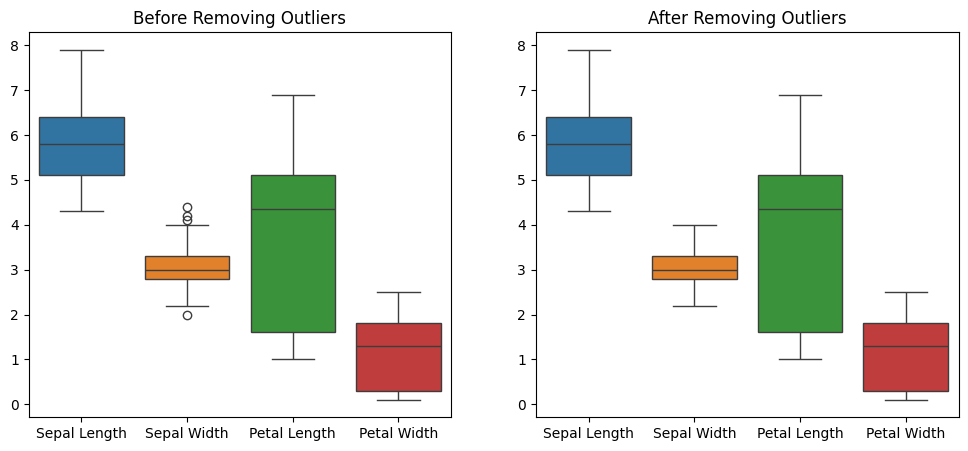

Data after removing outliers:
     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [87]:
# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# function to remove outliers
def remove_outlier(data):
    return df[(df >= lower_bound) & (df <= upper_bound)]

# Remove outliers
df_filtered = remove_outlier(df)

# Plot before and after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered)
plt.title("After Removing Outliers")

plt.show()

print("Data after removing outliers:")
print(df_filtered)
